In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df = df.drop("CustomerID", axis=1)

In [5]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [6]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [7]:
X_scaled[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

In [8]:
print(np.mean(X_scaled, axis=0))
print(np.std(X_scaled, axis=0))

[-2.13162821e-16 -1.46549439e-16]
[1. 1.]


In [9]:
inertia = []

K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

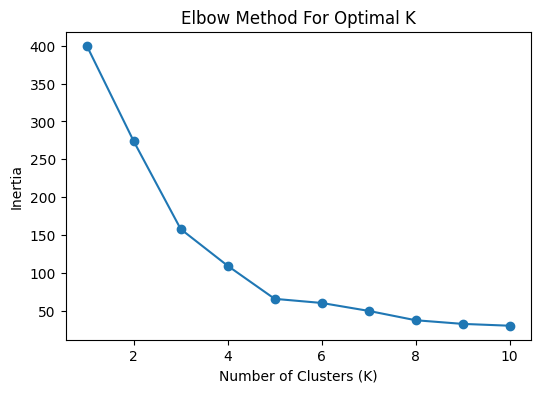

In [10]:
plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method For Optimal K")
plt.show()

In [11]:
kmeans = KMeans(n_clusters=5, random_state=42)

kmeans.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)

In [12]:
labels = kmeans.labels_
labels[:10]

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2], dtype=int32)

In [13]:
df["Cluster"] = labels
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,4
1,Male,21,15,81,2
2,Female,20,16,6,4
3,Female,23,16,77,2
4,Female,31,17,40,4


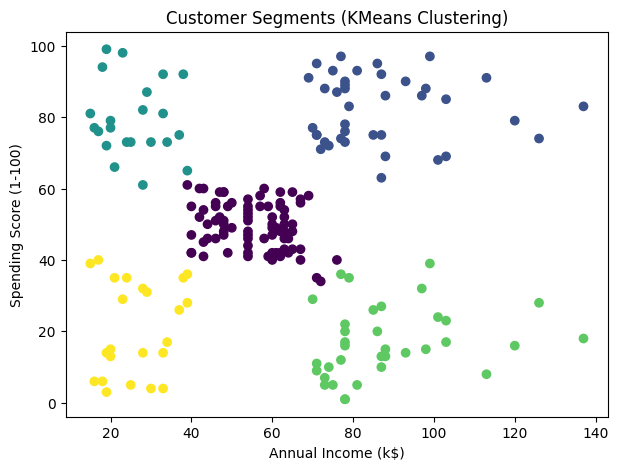

In [14]:
plt.figure(figsize=(7,5))

plt.scatter(
    df["Annual Income (k$)"],
    df["Spending Score (1-100)"],
    c=df["Cluster"],
)

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segments (KMeans Clustering)")

plt.show()

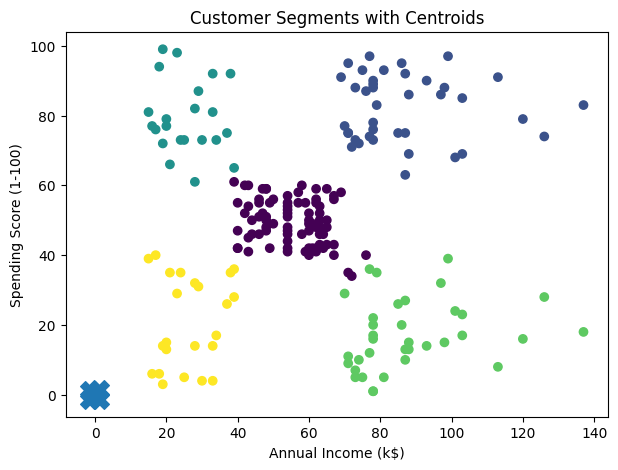

In [15]:
centroids = kmeans.cluster_centers_

plt.figure(figsize=(7,5))

plt.scatter(
    df["Annual Income (k$)"],
    df["Spending Score (1-100)"],
    c=df["Cluster"]
)

plt.scatter(
    centroids[:,0],
    centroids[:,1],
    s=200,
    marker='X'
)

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segments with Centroids")

plt.show()

In [18]:
df.groupby("Cluster").mean(numeric_only=True)

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


### Cluster Interpretation

Cluster 0 → Low income, low spending → Budget customers  
Cluster 1 → High income, high spending → Premium customers  
Cluster 2 → High income, low spending → Conservative customers  
Cluster 3 → Medium income, medium spending → Average customers  
Cluster 4 → Low income, high spending → Impulsive buyers

In [19]:
df.to_csv("segmented_customers.csv", index=False)

## Cluster Interpretation

Cluster 0 → Low income, low spending → Budget customers  
Cluster 1 → High income, low spending → Conservative customers  
Cluster 2 → Medium income, medium spending → Average customers  
Cluster 3 → Low income, high spending → Impulsive shoppers  
Cluster 4 → High income, high spending → Premium/VIP customers